# Working with Metrica Data - setting the stage for Project 1

In [12]:
import numpy as np
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

import matplotlib.pyplot as plt
import os

In [13]:
# Import some classes that I shamelessly borrowed from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
import Metrica_IO as mio
import Metrica_Viz as mviz

In [14]:
# set up initial path to data
DATADIR = os.path.join("sample-data","data")
game_id = 2 # let's look at sample match 2


## Event Data

In [15]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [16]:
# count the number of each event type in the data
print( events['Type'].value_counts() )

Type
PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: count, dtype: int64


In [17]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [18]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [19]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()
away_events['Type'].value_counts()

Type
PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: count, dtype: int64

In [20]:
home_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
10,Home,BALL OUT,NaN,1,504,20.16,534,21.36,Player3,NaN,12.72,-28.56,4.24,-34.68
18,Home,CHALLENGE,AERIAL-WON,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN
19,Home,RECOVERY,INTERCEPTION,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Home,SET PIECE,FREE KICK,2,139891,5595.64,139891,5595.64,Player9,NaN,NaN,NaN,NaN,NaN
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.00,Player9,NaN,21.20,-1.36,50.88,-1.36
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


## Tracking Data

In [21]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# # plot player positions at ,atckick-off
# KO_Frame = events.loc[0]['Start Frame']
# fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )



Reading team: home
Reading team: away


In [22]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,NaN,NaN,-9.97248,28.55864,-11.75010,-4.36084,-14.61104,-4.22824,NaN,NaN,-22.86844,9.62540,NaN,NaN,-9.71278,24.17468,1.09392,-30.29672,-23.36028,9.04400,NaN,NaN
141153,2,5646.12,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,NaN,NaN,-9.97248,28.55864,-11.69710,-4.34860,-14.61104,-4.22824,NaN,NaN,-22.93310,9.56556,NaN,NaN,-9.71278,24.17468,1.09286,-30.34568,-23.31046,9.03176,NaN,NaN
141154,2,5646.16,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,NaN,NaN,-9.97248,28.55864,-11.67484,-4.30372,-14.61104,-4.22824,NaN,NaN,-22.97868,9.47444,NaN,NaN,-9.71278,24.17468,1.09074,-30.40348,-23.28714,9.02632,NaN,NaN


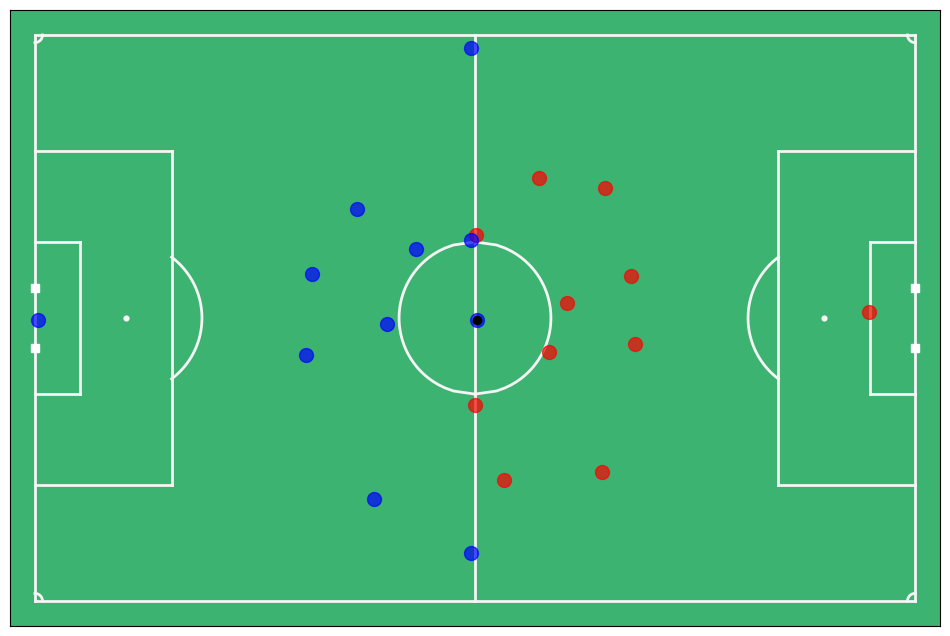

In [23]:
# plot player positions at ckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )


## Let's examine some passes

In [24]:
passes = events.loc[events["Type"]=="PASS"]

In [25]:
passes["Subtype"].unique()

array([nan, 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
       'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

In [26]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,-25.44,-10.88,-24.38,-27.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,Home,PASS,NaN,2,137209,5488.36,137221,5488.84,Player1,Player6,-9.54,12.24,-4.24,4.76
1915,Home,PASS,NaN,2,137263,5490.52,137303,5492.12,Player6,Player1,-4.24,12.24,-12.72,21.76
1916,Home,PASS,NaN,2,137303,5492.12,137332,5493.28,Player1,Player5,-12.72,21.76,-1.06,26.52
1917,Home,PASS,NaN,2,137334,5493.36,137359,5494.36,Player5,Player1,-1.06,26.52,-15.90,26.52


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

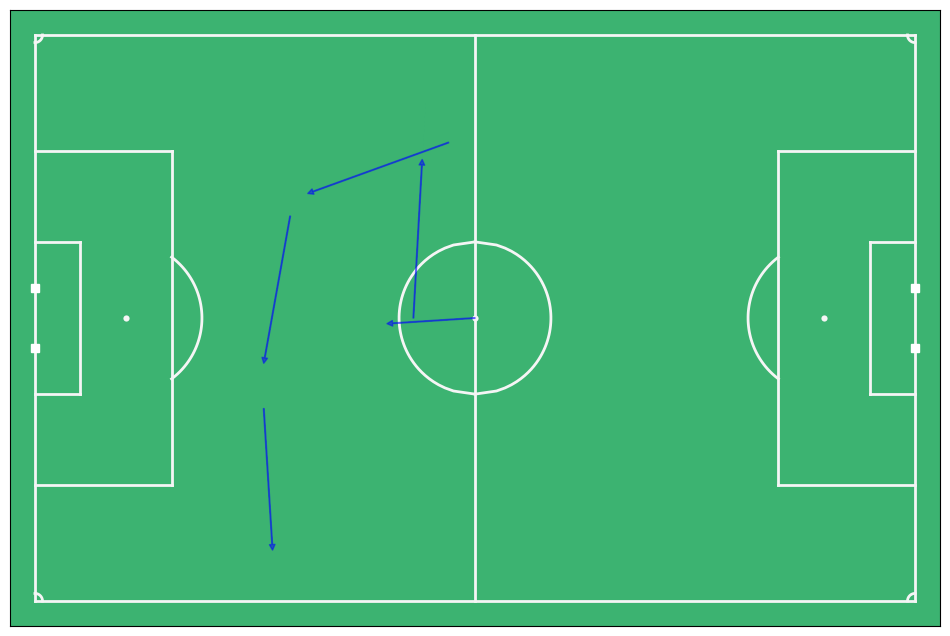

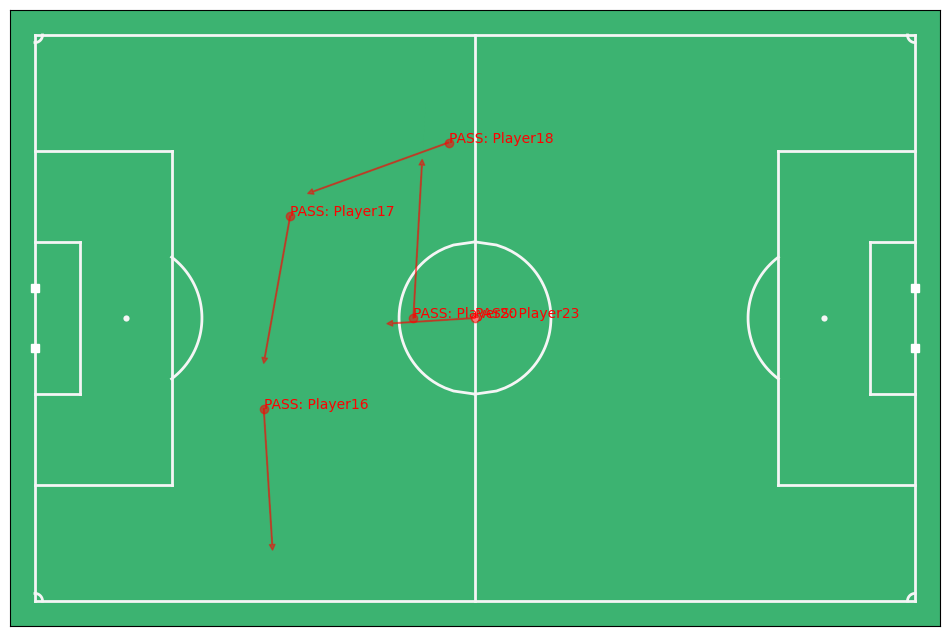

In [27]:
fig, ax= mviz.plot_pitch()


# Two ways to plot the first 4 passes:
for index, row in passes.iterrows():
    if index > 5: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
    
# That's essentially all that's in the plot_events function
mviz.plot_events( passes.iloc[0:5], indicators = ['Marker','Arrow'], annotate=True )

Text(-9.540000000000003, 12.24, '')

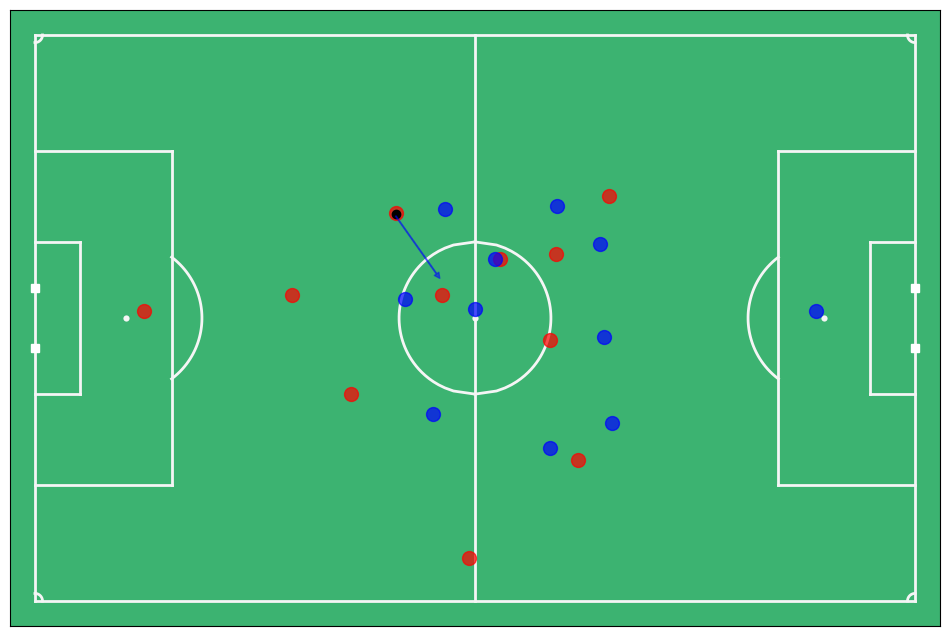

In [28]:
# We can also plot a single pass and all the positions of each team
pass_of_interest_loc = 1914
pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number] )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)


Interesting, nan passes seem to be a standard pass. You could filter on a specific type, or use them all.

Pseudocode to calculate a naive "Impact Factor"

For every pass:

        Get the position it started at and the position it ended at in the X-direction

        Get the X-coordinate of all opposition players
        
        Count how many opposition players the pass "outplays"
        Add that new Impact Factor score to the dataframe for that pass.
    

Extra Points go to fast implementations :)
    

[(0.3841160870561997, -5.9876919452878195),
 (-10.2158839129438, -6.667691945287819),
 (-10.984116087056199, 5.30769194528782),
 (-0.3841160870561997, 5.9876919452878195)]

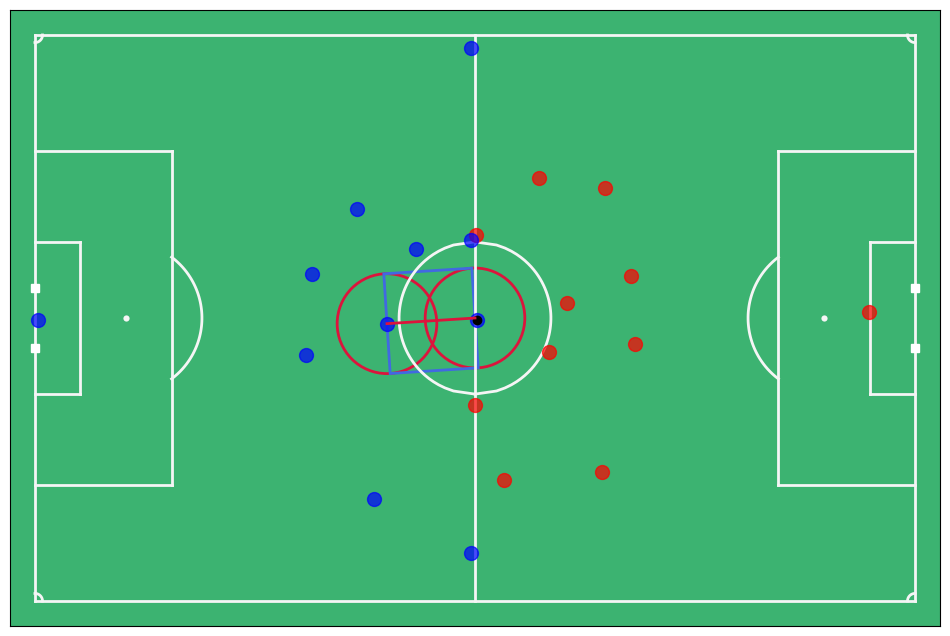

In [81]:
#Call the custom function in the .py file to draw the capsule passing graph
import capsule_pass_figure as cap
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )
cap.capsule(ax,0,0,-10.6,-0.68 )

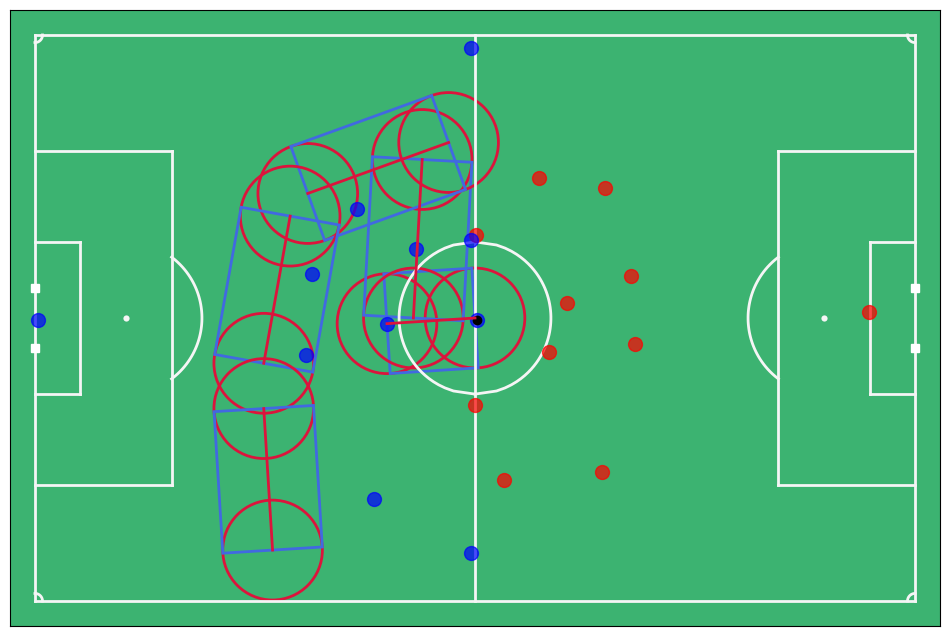

In [80]:
#Draw a continuous pass (capsule shape)
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

start_points=[]*7
end_points=[]*7
for index, row in passes.iterrows():
  if index > 7: continue
  cap.capsule(
        ax,
        row['Start X'], row['Start Y'],
        row['End X'], row['End Y']
    )
  start_point = [row['Start X'], row['Start Y']]
  end_point = [row['End X'], row['End Y']]
  start_points.append(start_point)
  end_points.append(end_point)

[(-4.251805849893607, 15.574354378413364),
 (0.7481941501063929, 8.094354378413364),
 (-9.228194150106393, 1.4256456215866358),
 (-14.228194150106393, 8.905645621586636)]

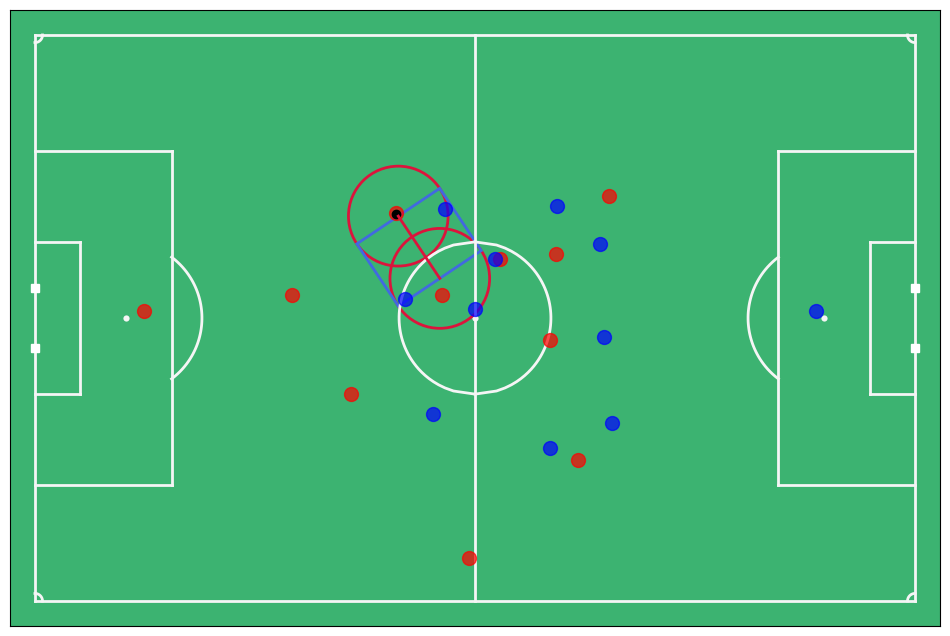

In [79]:
#there are have 2 impact factors in the single pass plot
import capsule_pass_figure as cap
KO_Frame = events.loc[1914]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )
cap.capsule(ax,-9.24,12.24,-4.24,4.76 )

In [82]:
#Extract the position of the opposing players（11 players）
start_time = [0]*8
for index, row in passes.iterrows():
  if index > 8: continue
  start_time[index] = row['Start Time [s]']

player1_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player1_x[time_index]=float(row['Home_1_x'])
        time_index=time_index+1

player1_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player1_y[time_index]=float(row['Home_1_y'])
        time_index=time_index+1

player2_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player2_x[time_index]=float(row['Home_2_x'])
        time_index=time_index+1

player2_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player2_y[time_index]=float(row['Home_2_y'])
        time_index=time_index+1

player3_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player3_x[time_index]=float(row['Home_3_x'])
        time_index=time_index+1

player3_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player3_y[time_index]=float(row['Home_3_y'])
        time_index=time_index+1

player4_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player4_x[time_index]=float(row['Home_4_x'])
        time_index=time_index+1

player4_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player4_y[time_index]=float(row['Home_4_y'])
        time_index=time_index+1

player5_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player5_x[time_index]=float(row['Home_5_x'])
        time_index=time_index+1

player5_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player5_y[time_index]=float(row['Home_5_y'])
        time_index=time_index+1

player6_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player6_x[time_index]=float(row['Home_6_x'])
        time_index=time_index+1

player6_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player6_y[time_index]=float(row['Home_6_y'])
        time_index=time_index+1

player7_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player7_x[time_index]=float(row['Home_7_x'])
        time_index=time_index+1

player7_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player7_y[time_index]=float(row['Home_7_y'])
        time_index=time_index+1

player8_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player8_x[time_index]=float(row['Home_8_x'])
        time_index=time_index+1

player8_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player8_y[time_index]=float(row['Home_8_y'])
        time_index=time_index+1

player9_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player9_x[time_index]=float(row['Home_9_x'])
        time_index=time_index+1

player9_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player9_y[time_index]=float(row['Home_9_y'])
        time_index=time_index+1

player10_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player10_x[time_index]=float(row['Home_10_x'])
        time_index=time_index+1

player10_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player10_y[time_index]=float(row['Home_10_y'])
        time_index=time_index+1

player11_x = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player11_x[time_index]=float(row['Home_11_x'])
        time_index=time_index+1

player11_y = [0]*7
time_index=0
for index,row in tracking_home.iterrows():
    if time_index > 7 : continue
    tmp = float(row['Time [s]'])
    if tmp==float(start_time[time_index+1]):
        player11_y[time_index]=float(row['Home_11_y'])
        time_index=time_index+1


In [83]:
#Positions of the 11 opposing players at the time of the pass
point_per_pass = [0]*11

results_list = []*7
index=0
for index, pt in enumerate(start_points):
    if index > 7 :
        break
    point_per_pass = [(player1_x[index],player1_y[index]),
                      (player2_x[index],player2_y[index]),
                      (player3_x[index],player3_y[index]),
                      (player4_x[index],player4_y[index]),
                      (player5_x[index],player5_y[index]),
                      (player6_x[index],player6_y[index]),
                      (player7_x[index],player7_y[index]),
                      (player8_x[index],player8_y[index]),
                      (player9_x[index],player9_y[index]),
                      (player10_x[index],player10_y[index]),
                      (player11_x[index],player11_y[index])]
    rect, results = cap.classify_points(point_per_pass,pt,end_points[index])
    index+=1
    results_list.append(results)

#rect, results = cap.classify_points(points,)
results_list

[[{'point': (15.674219999999995, 15.618920000000001),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (18.828779999999995, 5.0116),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (19.231579999999997, -3.1429600000000026),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (15.302160000000004, -18.46472),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (7.719979999999994, 16.75928),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (11.091839999999996, 1.8101599999999984),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (8.863720000000002, -4.0398799999999975),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (3.5149599999999968, -19.480639999999998),
   'in_circle1': False,
   'in_circle2': False,
   'in_rect': False},
  {'point': (0.14839999999999542, 9.99

In [84]:
#Determine whether the opponent player is in the capsule map
impact_factors = []
impact_counts = []
rect_factors = []
rect_counts = []

factor = 1 if any(r['in_circle1'] or r['in_circle2'] for r in results) else 0
impact_factors.append(factor)

count = sum(1 for r in results if r['in_circle1'] or r['in_circle2'])
impact_counts.append(count)

rect_count = sum(1 for r in results if r['in_rect'])
rect_counts.append(rect_count)

rect_factor = 1 if rect_count > 0 else 0
rect_factors.append(rect_factor)

index += 1
results_list, impact_factors, impact_counts, rect_factors,rect_counts

([[{'point': (15.674219999999995, 15.618920000000001),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (18.828779999999995, 5.0116),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (19.231579999999997, -3.1429600000000026),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (15.302160000000004, -18.46472),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (7.719979999999994, 16.75928),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (11.091839999999996, 1.8101599999999984),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (8.863720000000002, -4.0398799999999975),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'point': (3.5149599999999968, -19.480639999999998),
    'in_circle1': False,
    'in_circle2': False,
    'in_rect': False},
   {'p

In [85]:
#Export table impact factor
df_impact = pd.DataFrame({
    'start_point': start_points[:len(impact_factors)],
    'end_point': end_points[:len(impact_factors)],
    'impact_factor': impact_factors,
    'impact_count': impact_counts
})

df_impact

,start_point,end_point,impact_factor,impact_count
0,"[0.0, -0.0]","[-10.599999999999998, -0.6800000000000006]",1,1
